In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df['TotalCharges']= df['TotalCharges'].replace(" ","0")
df['TotalCharges']= df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df['customerID'].duplicated().sum()

np.int64(0)

In [17]:
def conv(value):
         if value == 1:
             return "yes"
         else:
             return "no"

df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

<function matplotlib.pyplot.show(close=None, block=None)>

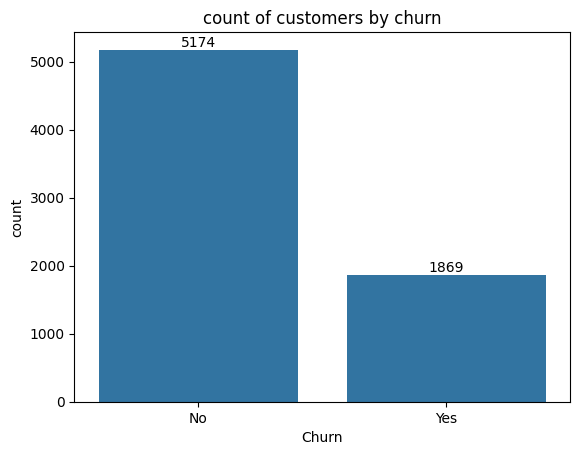

In [20]:
ax= sns.countplot(x= 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show

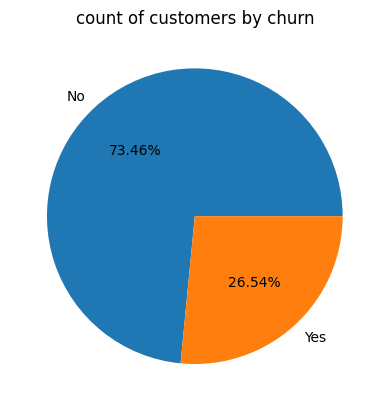

In [21]:
gb= df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct= "%1.2f%%")
plt.title("count of customers by churn")
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have been churned out.
#now lets explore the reason behind it.

<function matplotlib.pyplot.show(close=None, block=None)>

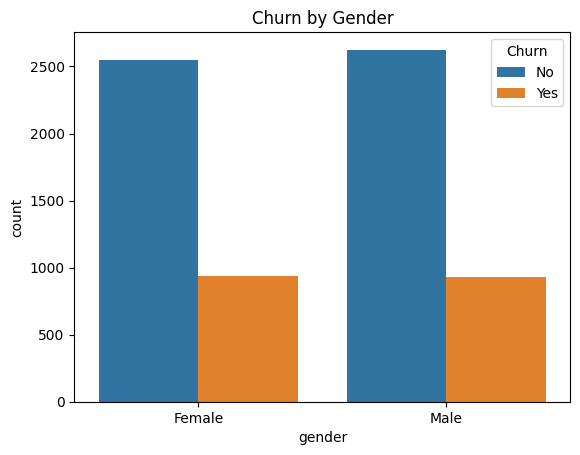

In [24]:
sns.countplot(x= "gender", data = df, hue= "Churn")
plt.title('Churn by Gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

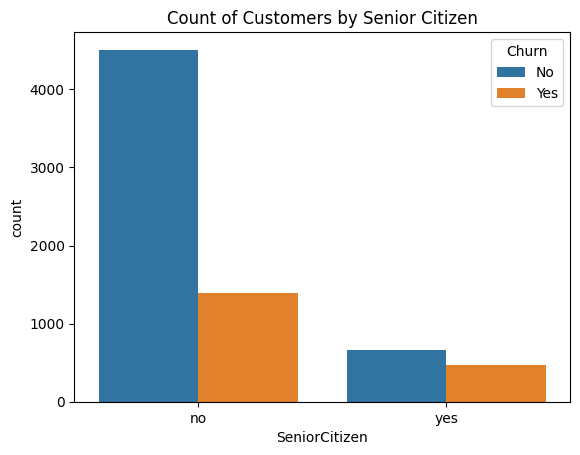

In [29]:
sns.countplot(x= "SeniorCitizen", data = df, hue= "Churn")
plt.title('Count of Customers by Senior Citizen')
ax.bar_label(ax.containers[0])
plt.show

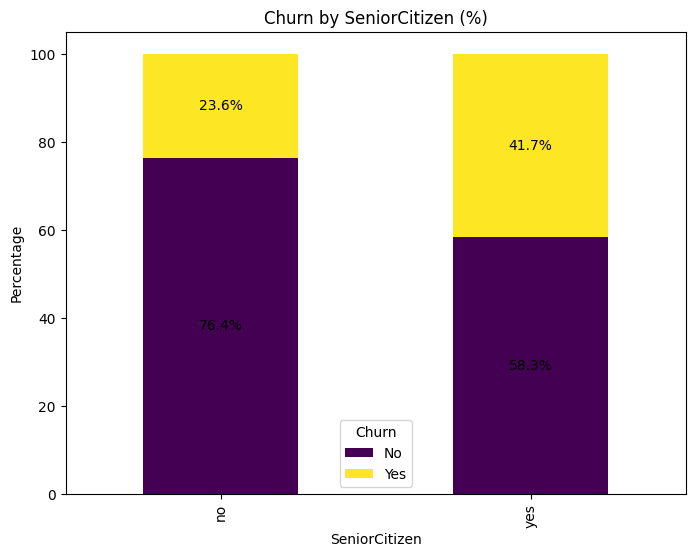

In [26]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert to % of total per SeniorCitizen
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
ax = percentages.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')

# Add % labels
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Churn by SeniorCitizen (%)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn')
plt.show()

#comparatively a gretaer percentage of senior citizens have churned out

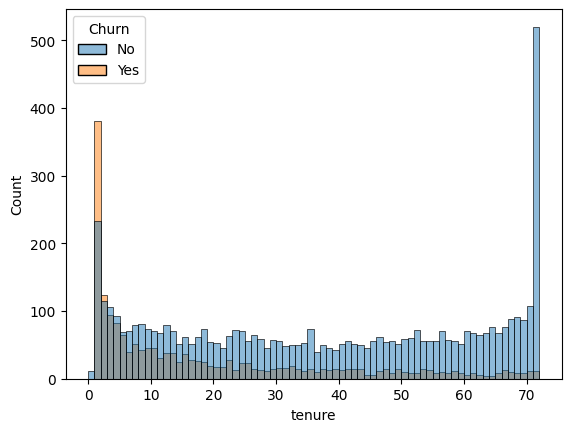

In [31]:
sns.histplot(x="tenure", data= df, bins= 72, hue= "Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for 1 or2 months have churned out

<function matplotlib.pyplot.show(close=None, block=None)>

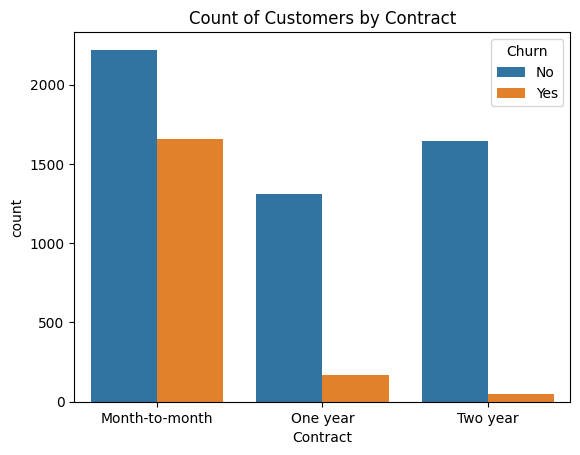

In [32]:
sns.countplot(x= "Contract", data = df, hue= "Churn")
plt.title('Count of Customers by Contract')
ax.bar_label(ax.containers[0])
plt.show

# people who have month to month contract are likely to churn then who have one or two year contracrt

In [33]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

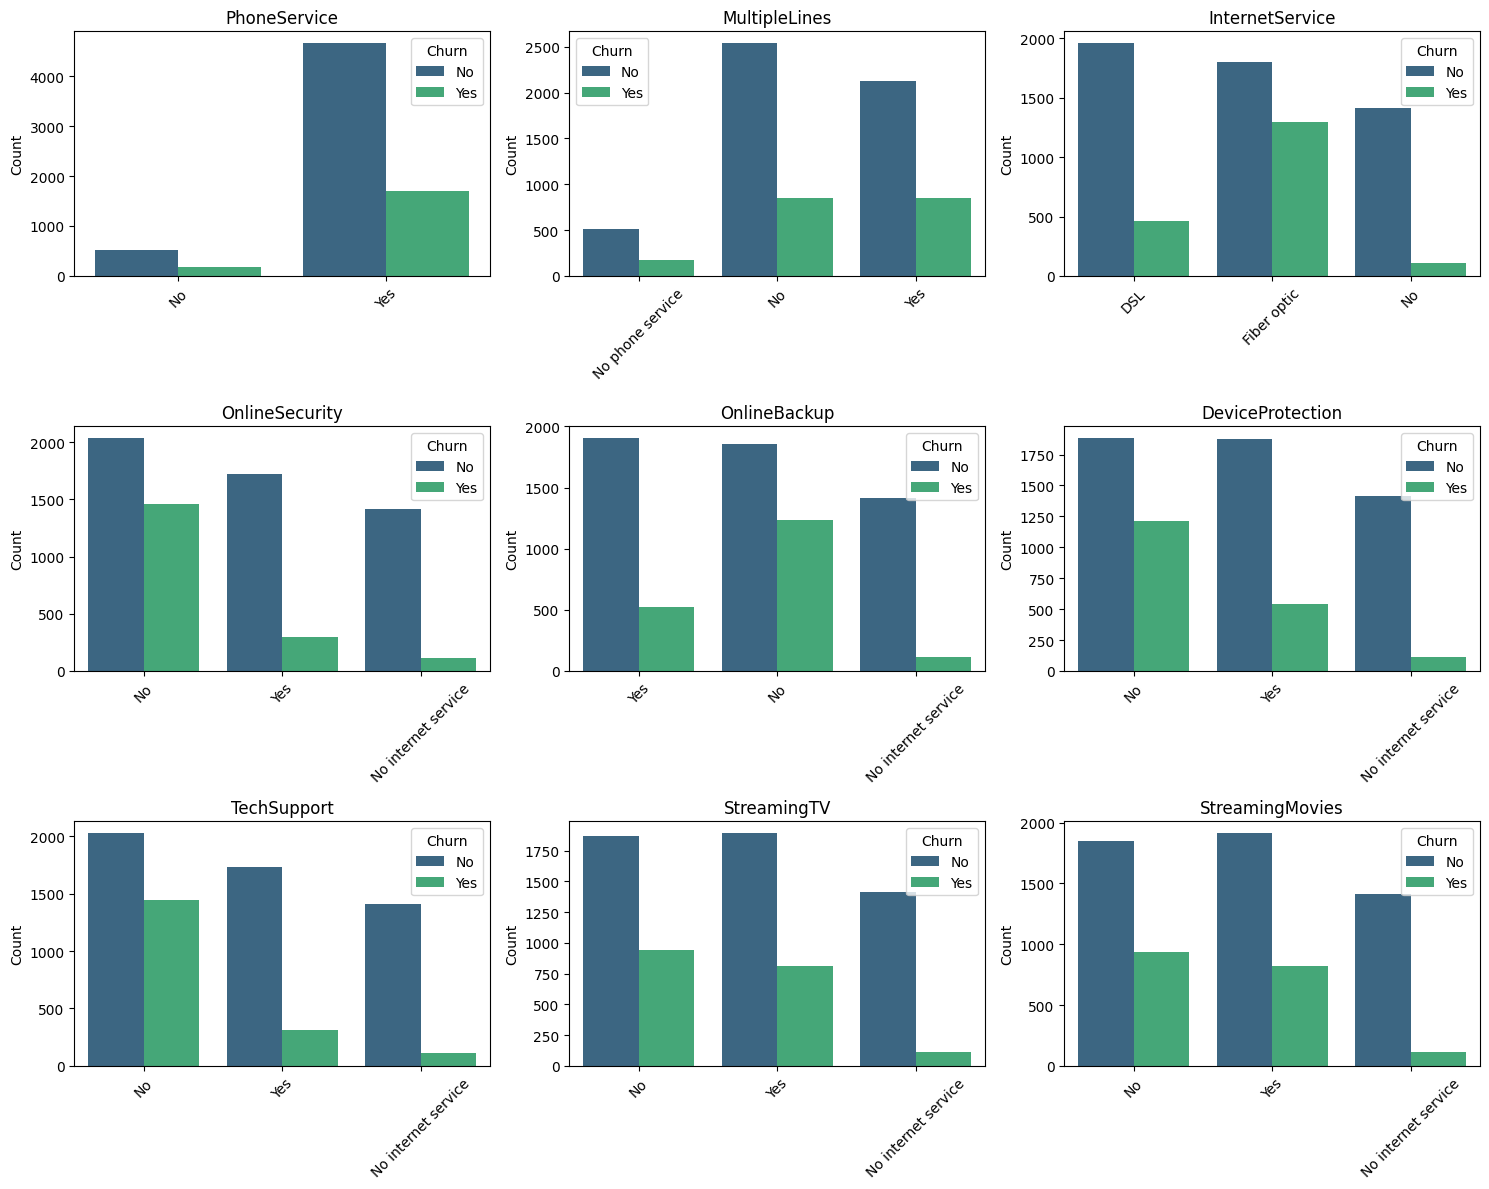

In [35]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine subplot grid size
n_cols = 3  # Number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, palette='viridis', hue= df["Churn"])
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate labels for readability
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show() 

# the visualisation present count plots showing customer churn(yes or no) across various feature such as Phoneservice, Multiplelines, Internetservice, and onlinesecurity.
# The majority of customers who do not churn tend to have services like phoneservice, internetservice(partuicularly DSL), and onlinesecurity enabled.
# For services like onlinebackup, techsupport, and streamingtv, churn rates are noticebly higher when these services are not used or unavailable.
# The charts emphasizes the relationship between service usage and customer churn.

<function matplotlib.pyplot.show(close=None, block=None)>

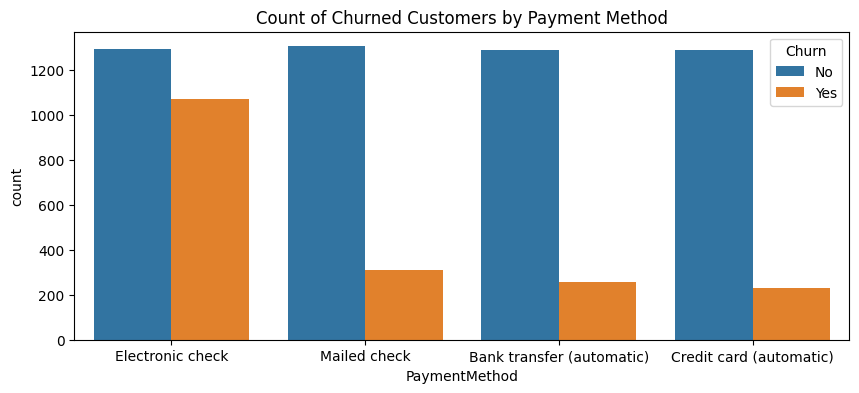

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(x= "PaymentMethod", data = df, hue= "Churn")
plt.title('Count of Churned Customers by Payment Method')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show

# Customers are likely to churn when they are using electronic check.